# Data Understanding and Manipulation

#### Telco Customer Churn
Focused customer retention programs

dataset link https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', skipinitialspace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data semantics 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [4]:
# variables extra info
v_name = []
v_type = []
v_domain = []
v_is_null = []
for c in df.columns:
    col_list = df[c]
    v_name.append(c)
    v_type.append(type(col_list[0]))
    v_domain.append(sorted(col_list.unique()))
    v_is_null.append(col_list.isnull().any())
    
d = {'variable': v_name, 'type': v_type, 'domain': v_domain, 'any_null': v_is_null}
pd.DataFrame(data=d).set_index('variable')

,type,domain,any_null
variable,,,
customerID,<class 'str'>,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...",False
gender,<class 'str'>,"[Female, Male]",False
SeniorCitizen,<class 'numpy.int64'>,"[0, 1]",False
Partner,<class 'str'>,"[No, Yes]",False
Dependents,<class 'str'>,"[No, Yes]",False
tenure,<class 'numpy.int64'>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
PhoneService,<class 'str'>,"[No, Yes]",False
MultipleLines,<class 'str'>,"[No, No phone service, Yes]",False
InternetService,<class 'str'>,"[DSL, Fiber optic, No]",False


In [5]:
# Let's split variables in two kind of subsets:

# customer_info and contract_info
customer_info = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
contract_info = [
    'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
    'TotalCharges', 'Churn'
]

# categorical_variables and numeric_variables
cat_variables = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',  'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]
num_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']

## Variables transformations and Assessing data quality (missing values)

In [6]:
#create a new dataframe which will be the one to work on
customers = df.copy()
#remove 'customerID' variable and use the default index as ID
customers.drop(columns=['customerID'], inplace=True)
customers.index.names=['id']

In [7]:
#align SeniorCitizen to other categorical features domain (not needed to have it as integer)
customers["SeniorCitizen"] = customers["SeniorCitizen"].map({1:'Yes', 0: 'No'})

##### Check null values

In [8]:
customers.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
tc_tmp_df = customers[customers['TotalCharges'].isnull()][['TotalCharges']]
tc_tmp_df

,TotalCharges
id,
488,NaN
753,NaN
936,NaN
1082,NaN
1340,NaN
3331,NaN
3826,NaN
4380,NaN
5218,NaN


In [10]:
# In order to understand the meaning of the null values above, an intuition might to check the 'tenure' values, so that 
# we can see whether the null values have to meant as zero
t_tmp_def = customers[customers['tenure'] == 0][['tenure']]
t_tmp_def

,tenure
id,
488,0
753,0
936,0
1082,0
1340,0
3331,0
3826,0
4380,0
5218,0


In [11]:
tc_tmp_df.join(t_tmp_def, how='outer')
# by the output below we can see that the null values are because of the 'tenure' values equal to zero, so we can replace
# them with zero

,TotalCharges,tenure
id,,
488,NaN,0
753,NaN,0
936,NaN,0
1082,NaN,0
1340,NaN,0
3331,NaN,0
3826,NaN,0
4380,NaN,0
5218,NaN,0


In [12]:
customers['TotalCharges'].fillna(value=0, inplace=True) 
customers[customers['TotalCharges'] == 0][['TotalCharges', 'tenure']]

,TotalCharges,tenure
id,,
488,0.0,0
753,0.0,0
936,0.0,0
1082,0.0,0
1340,0.0,0
3331,0.0,0
3826,0.0,0
4380,0.0,0
5218,0.0,0


In [13]:
customers.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## Distribution of the variables and statistics 

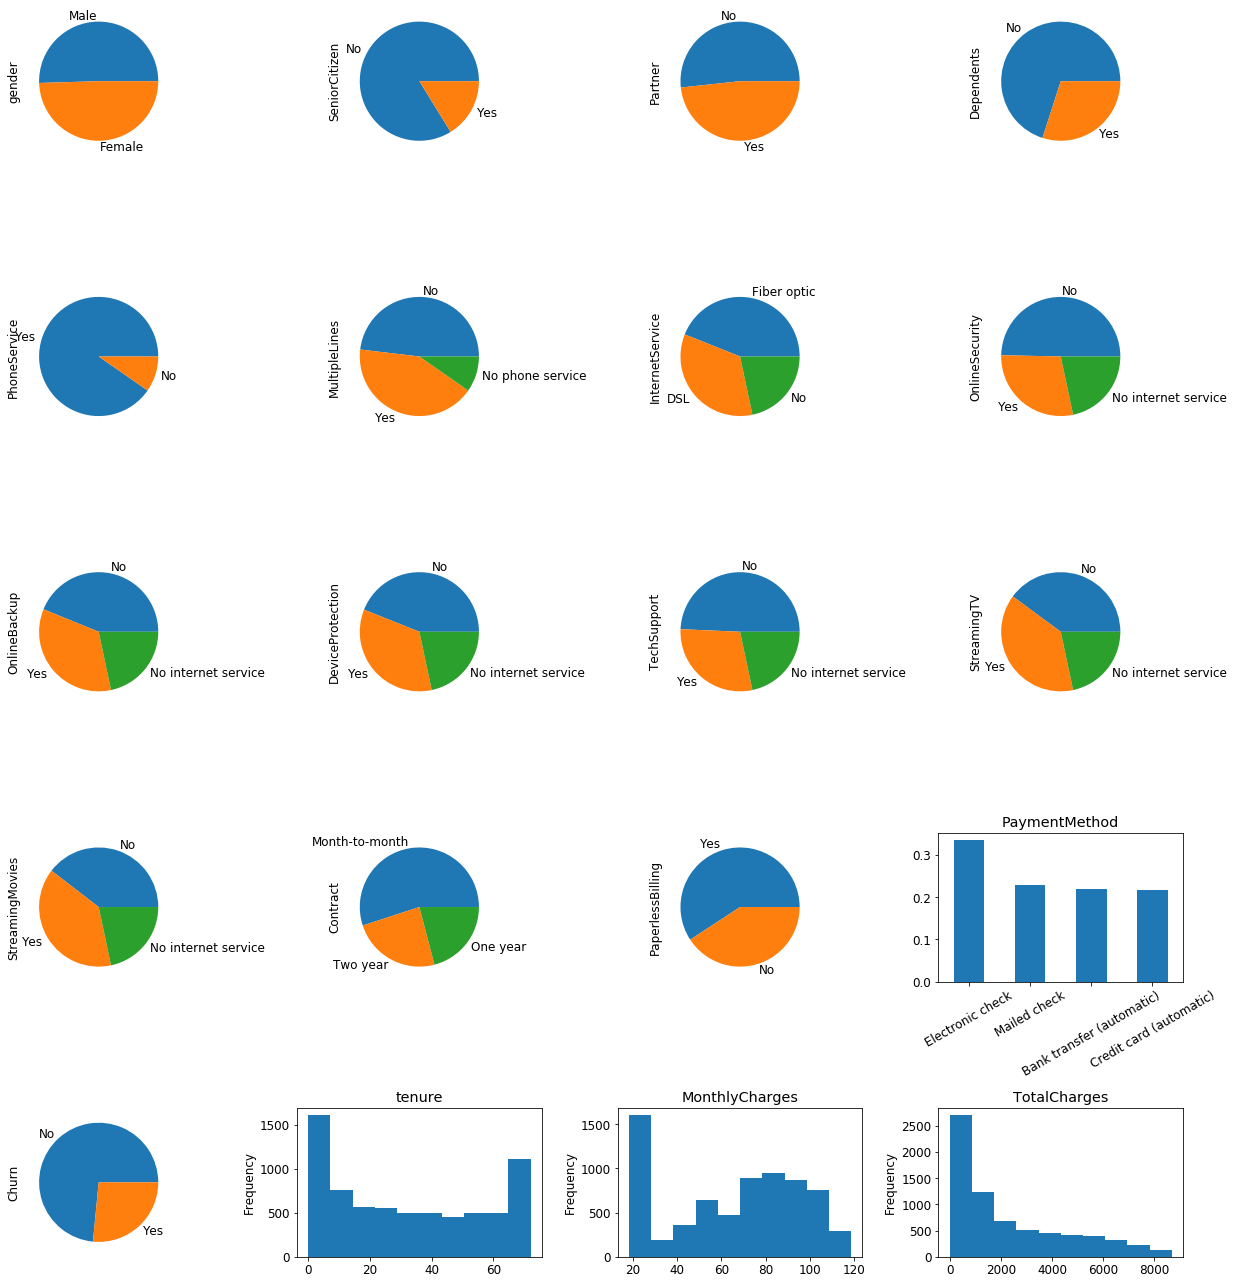

In [14]:
cols = [
    # customer_info
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    # contract_info/categorical
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn',
    # contract_info/numeric
    'tenure','MonthlyCharges', 'TotalCharges'
]
# variables to plot as hist
hist_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 18)) 
fig_dims = (5, 4)

plt.rcParams['font.size'] = 12.0

i = 0
j = 0
for c in cols:
    plt.subplot2grid(fig_dims, (i, j))
        
    if (c not in hist_cols):
        #customers[c].value_counts(normalize = True).plot(kind = 'bar', title = c, color=v_color)
        #plt.xticks(rotation =0)
        value_counts = customers[c].value_counts(normalize = True)
        if (len(value_counts) < 4):
            value_counts.plot.pie()
        else:
            value_counts.plot(kind = 'bar', title = c)
            plt.xticks(rotation =30)
    else:
        customers[c].plot.hist()
        plt.title(c)
        
    if (j < 3):
        j += 1
    else:
        j = 0
        i += 1
        
plt.tight_layout()
plt.show()
plt.rcParams['font.size'] = 10

In [15]:
customers[num_variables].describe(include='all')

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Crosstabs and Density

#### Internet and Phone services by customer info

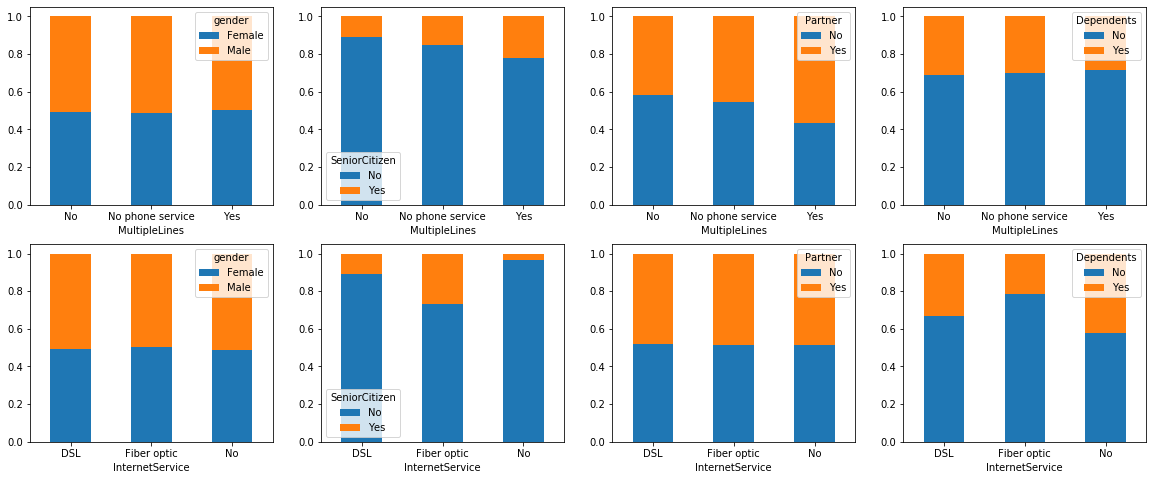

In [16]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 8)) 
fig_dims = (2, 4)

i = 0
j = 0
for c in customer_info:
    
    ax_1 = plt.subplot2grid(fig_dims, (i, j))
    cross_df = pd.crosstab(customers['MultipleLines'], customers[c])
    #cross_df.plot(kind='bar', stacked=True, title='MultipleLines', ax=ax_1)
    cross_df.div(cross_df.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax_1)
    plt.xticks(rotation =0)
    
    ax_1 = plt.subplot2grid(fig_dims, (i+1, j))
    cross_df = pd.crosstab(customers['InternetService'], customers[c])
    #cross_df.plot(kind='bar', stacked=True, title='InternetService', ax=ax_1)
    cross_df.div(cross_df.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax_1)
    plt.xticks(rotation =0)
        
    if (j < 3):
        j += 1
    else:
        j = 0
        i += 1
        
plt.show()

#### Contract

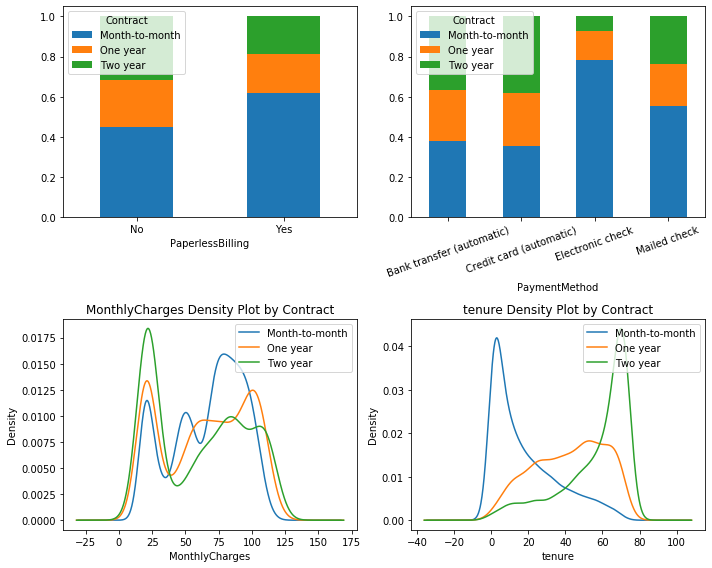

In [17]:
contract_values = customers['Contract'].unique()

fig = plt.figure(figsize=(10, 8)) 
fig_dims = (2, 2)

ax_1 = plt.subplot2grid(fig_dims, (0, 0))
cross_df = pd.crosstab(customers['PaperlessBilling'], customers['Contract'])
# Normalize the cross tab to sum to 1:
cross_df.div(cross_df.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax_1)
plt.xticks(rotation =0)

ax_1 = plt.subplot2grid(fig_dims, (0, 1))
cross_df = pd.crosstab(customers['PaymentMethod'], customers['Contract'])
# Normalize the cross tab to sum to 1:
cross_df.div(cross_df.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax_1)
plt.xticks(rotation =20)

ax_1 = plt.subplot2grid(fig_dims, (1, 0))
for c in contract_values:
    customers.MonthlyCharges[customers.Contract == c].plot(kind='kde', ax=ax_1)
plt.title('MonthlyCharges Density Plot by Contract')
plt.xlabel('MonthlyCharges')
plt.legend(contract_values, loc='upper right')

ax_1 = plt.subplot2grid(fig_dims, (1, 1))
for c in contract_values:
    customers.tenure[customers.Contract == c].plot(kind='kde', ax=ax_1)
plt.title('tenure Density Plot by Contract')
plt.xlabel('tenure')
plt.legend(contract_values, loc='upper right')

plt.tight_layout()
plt.show()

#### Churn

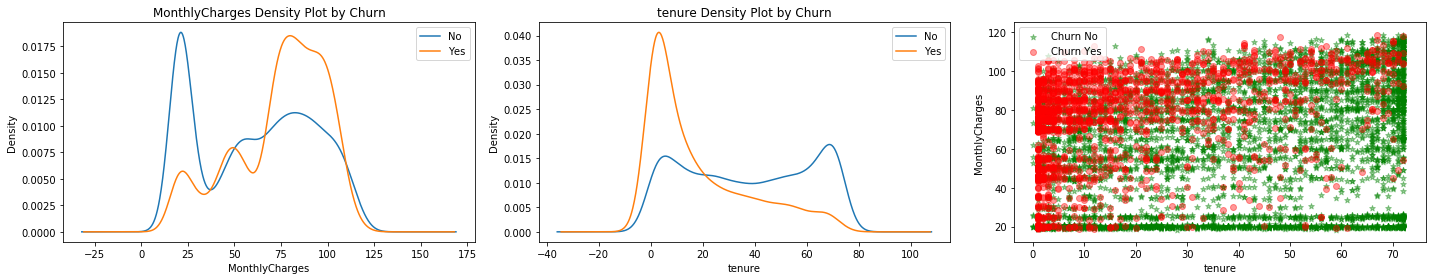

In [18]:
fig = plt.figure(figsize=(20, 4)) 
fig_dims = (1, 3)

churn_values = customers['Churn'].unique()
ax_1 = plt.subplot2grid(fig_dims, (0, 0))
for c in churn_values:
    customers.MonthlyCharges[customers.Churn == c].plot(kind='kde', ax=ax_1)
plt.title('MonthlyCharges Density Plot by Churn')
plt.xlabel('MonthlyCharges')
plt.legend(churn_values, loc='upper right')

ax_1 = plt.subplot2grid(fig_dims, (0, 1))
for c in churn_values:
    customers.tenure[customers.Churn == c].plot(kind='kde', ax=ax_1)
plt.title('tenure Density Plot by Churn')
plt.xlabel('tenure')
plt.legend(churn_values, loc='upper right')

ax_1 = plt.subplot2grid(fig_dims, (0, 2))
plt.scatter(customers[customers['Churn'] == 'No']['tenure'], 
            customers[customers['Churn'] == 'No']['MonthlyCharges'], color='g', marker='*', label='Churn No', alpha=0.4)
plt.scatter(customers[customers['Churn'] == 'Yes']['tenure'], 
            customers[customers['Churn'] == 'Yes']['MonthlyCharges'], color='r',label='Churn Yes', alpha=0.4)
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
plt.legend()

plt.tight_layout()
plt.show()

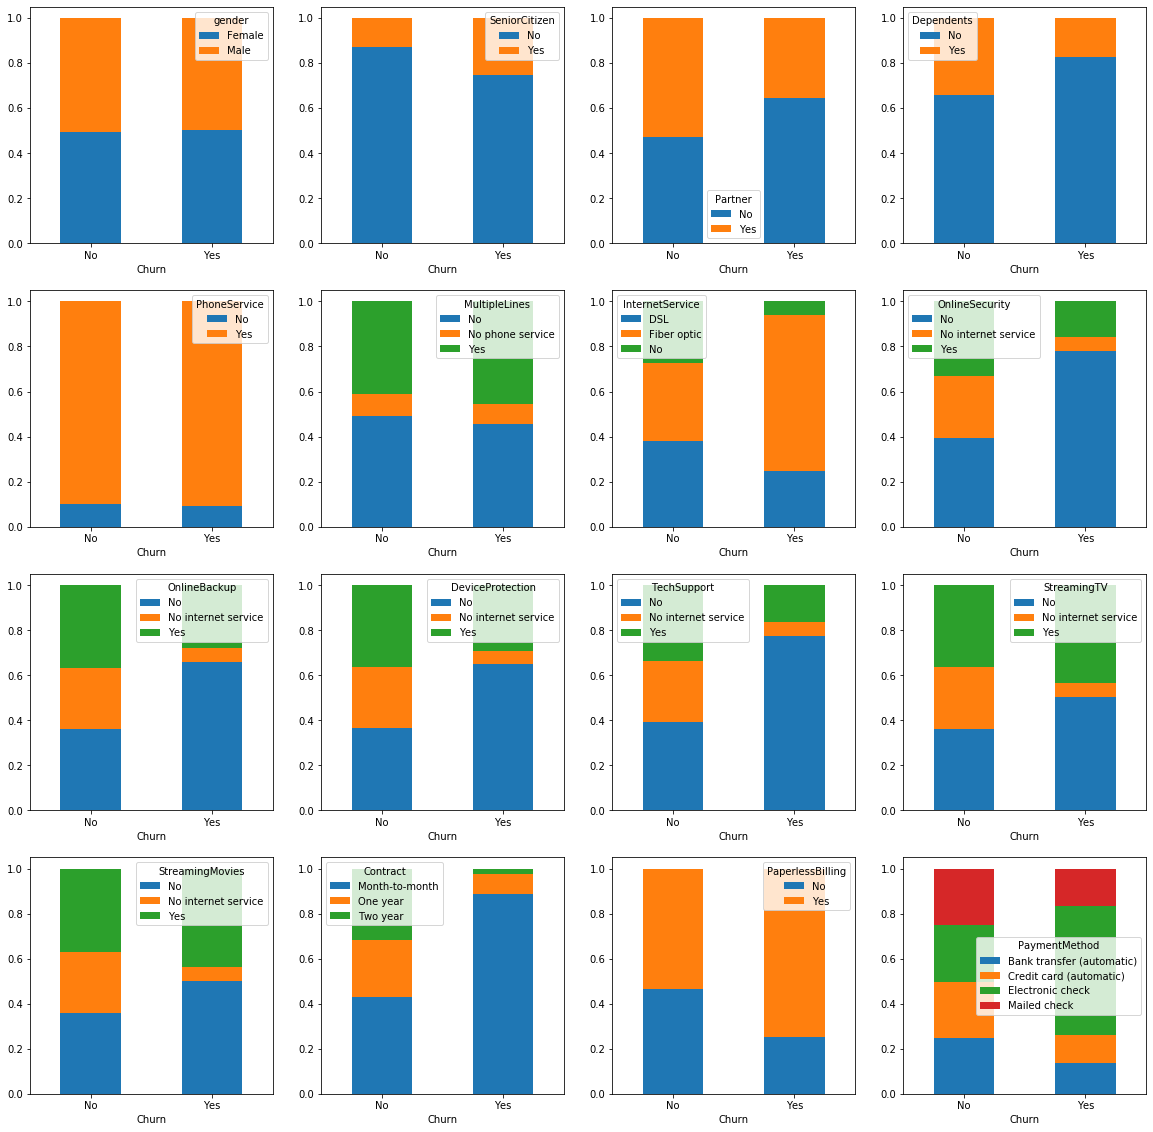

In [19]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (4, 4)

cols = [
    # customer_info
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    # contract_info/categorical
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

i = 0
j = 0

for c in cols:
    
    ax_1 = plt.subplot2grid(fig_dims, (i, j))
    cross_df = pd.crosstab(customers['Churn'], customers[c])
    #cross_df.plot(kind='bar', stacked=True, title='MultipleLines', ax=ax_1)
    cross_df.div(cross_df.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax_1)
    plt.xticks(rotation =0)
        
    if (j < 3):
        j += 1
    else:
        j = 0
        i += 1
        
plt.show()

### Correlation

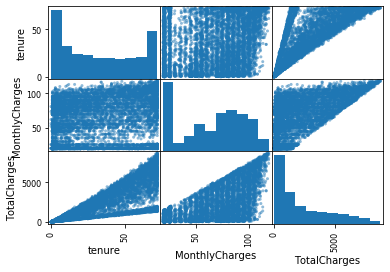

In [20]:
pd.plotting.scatter_matrix(customers[num_variables])
plt.show()

## Clustering by KModes and KPrototypes

##### https://github.com/nicodv/kmodes

In [21]:
e_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
contract_info = ['Contract', 'PaperlessBilling', 'PaymentMethod']
services = ['InternetService'] + e_services
numeric = ['tenure', 'MonthlyCharges']

### KModes

In [22]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

#### - target dataframe

In [23]:
kmodes_features = services + contract_info

km_df = customers[kmodes_features].copy()
km_df_values = km_df.values
km_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
id,,,,,,,,
0,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check
1,DSL,Yes,No,Yes,No,One year,No,Mailed check
2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check
3,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic)
4,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check


#### - generate distances matrix by Simple Matching index

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
def sm(a, b):
    den = len(b)
    num = 0
    for i in range(len(b)):
        if a[i] == b[i]:
            num += 1
    return num / den

km_df_2 = pd.get_dummies(km_df[[f for f in kmodes_features if f != 'PaperlessBilling']], prefix_sep='=')
km_df_2['PaperlessBilling'] = LabelEncoder().fit_transform(km_df['PaperlessBilling'])
km_df_2_values = km_df_2.values

distances = np.zeros((len(km_df_2_values),len(km_df_2_values)))

for i in range(len(km_df_2_values)):
    a = km_df_2_values[i]
    for j in range(len(km_df_2_values)):
        b = km_df_2_values[j]
        d = 1 - sm(a, b)
        distances[i][j] = d
        
print('DONE')

DONE


#### - perform kmodes many times by incrementing K [2,max] (running...)

In [27]:
k_max = 20
cost = []
silhouette = []

for k in range(2, k_max+1):
    km = KModes(n_clusters=k, init='Huang', n_init=10, n_jobs=4)
    km.fit_predict(km_df_values)
    cost.append(km.cost_)
    silhouette.append(silhouette_score(distances, km.labels_, metric="precomputed"))
    
print('DONE')

DONE


#### - plot Cost\~K and Silhouette~K

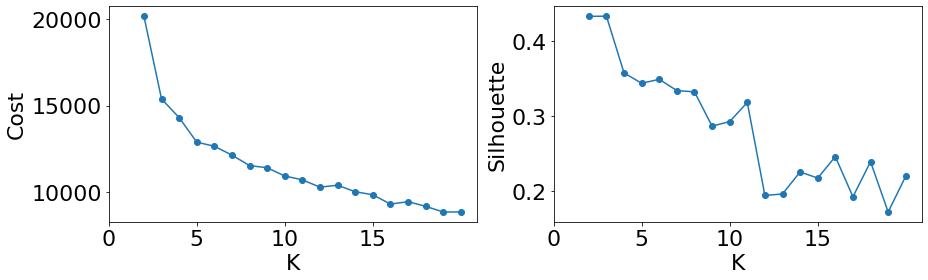

In [28]:
fig = plt.figure(figsize=(13, 4)) 
fig_dims = (1, 2)

plt.subplot2grid(fig_dims, (0, 0))
plt.plot(range(2, len(cost) + 2), cost, marker='o')
plt.ylabel('Cost', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, k_max, 5))
plt.tick_params(axis='both', which='major', labelsize=22)

plt.subplot2grid(fig_dims, (0, 1))
plt.plot(range(2, len(silhouette) + 2), silhouette, marker='o')
plt.ylabel('Silhouette', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, k_max, 5))
plt.tick_params(axis='both', which='major', labelsize=22)

plt.tight_layout()
plt.show()

#### - generate clusters with a good value of K from the plot above (elbow rule) running...

In [29]:
km = KModes(n_clusters=5, init='Huang', n_init=30, n_jobs=4)
clusters = km.fit_predict(km_df_values)
print('DONE')

DONE


#### - clusters distribution

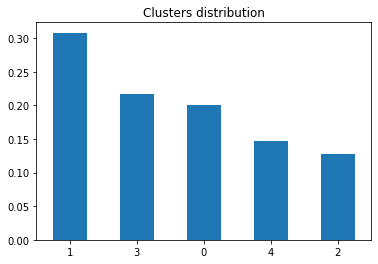

In [30]:
pd.Series(km.labels_) \
    .value_counts(normalize = True) \
    .plot(kind = 'bar', title = 'Clusters distribution')
plt.xticks(rotation=0)
plt.show()

#### - centroids

In [31]:
km_centroids_df = pd.DataFrame(km.cluster_centroids_)
km_centroids_df.columns = kmodes_features
km_centroids_df.index.names=['Cluster']
km_centroids_df

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
Cluster,,,,,,,,
0,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
1,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check
2,DSL,No,No,No,No,Month-to-month,No,Mailed check
3,No,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
4,DSL,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


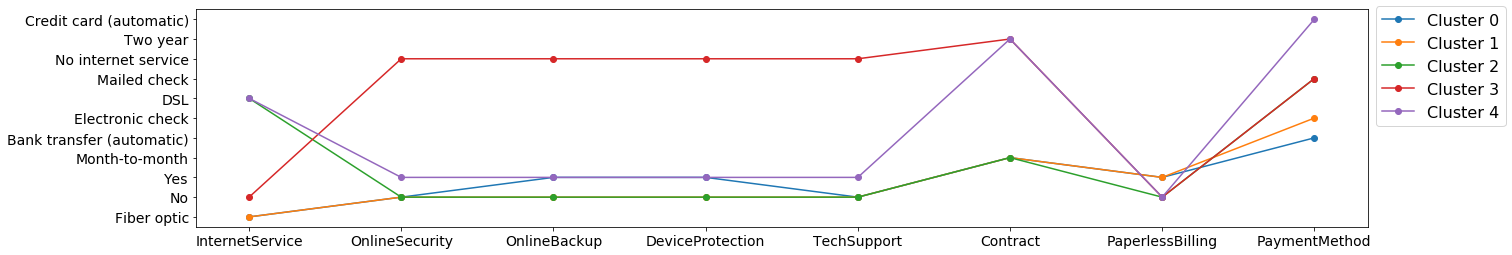

In [32]:
centers = km.cluster_centroids_
font_size = 16

plt.figure(figsize=(21, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=font_size)
plt.xticks(range(0, len(kmodes_features)), kmodes_features, fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)
plt.legend(fontsize=16, ncol=1, bbox_to_anchor=(1.0, 1.05))
plt.show()

#### - scatter plot MontlhyCharges~tenure with clusters labels as color

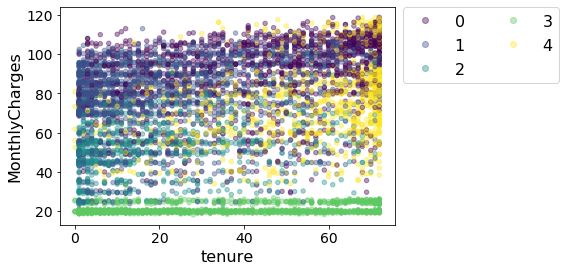

In [33]:
scatter = plt.scatter(customers['tenure'], customers['MonthlyCharges'], c=km.labels_, s=20, alpha = 0.4)

font_size = 16
plt.tick_params(axis='both', which='major', labelsize=font_size-2)

plt.ylabel('MonthlyCharges', fontsize=font_size)
plt.xlabel('tenure', fontsize=font_size)

plt.legend(*scatter.legend_elements(), fontsize=font_size, ncol=2, bbox_to_anchor=(1.0, 1.04))

plt.show()

#### - crosstab by Churn

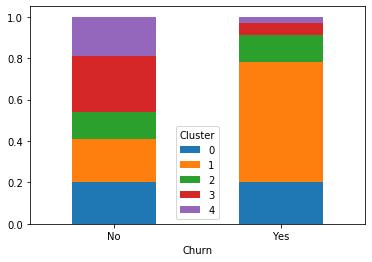

In [34]:
cluster_series = pd.Series(data=km.labels_, name='Cluster')
churn_cross = pd.crosstab(customers["Churn"], cluster_series)

churn_cross \
    .div(churn_cross.sum(1).astype(float), axis=0) \
    .plot(kind='bar', stacked = True)
plt.xticks(rotation=0)

plt.show()

#### - numeric feature info of the 'Churn Yes' cluster

In [35]:
brc_cluster_df = customers.copy()
brc_cluster_df[cluster_series.name] = cluster_series
brc_cluster_df[[c for c in brc_cluster_df.columns if c != 'Cluster']][brc_cluster_df['Cluster'] == 3].describe()

,tenure,MonthlyCharges,TotalCharges
count,1526.000000,1526.000000,1526.000000
mean,30.547182,21.079194,662.604784
std,24.356507,2.164221,555.627705
min,0.000000,18.250000,0.000000
25%,8.000000,19.700000,157.825000
50%,25.000000,20.150000,519.200000
75%,52.750000,20.900000,1108.650000
max,72.000000,26.900000,2006.950000


## Clustering by KMeans (only numeric)

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### - target dataframe

In [49]:
columns = ['tenure', 'MonthlyCharges']
tmcs_df = customers[columns].copy()

tmcs_df.head()

,tenure,MonthlyCharges
id,,
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


#### - scale values then generate clusters incrementing K, running...

In [50]:
scaler = MinMaxScaler()
tmcs_values = scaler.fit_transform(tmcs_df.values)
#tmcs_values[:5]

In [51]:
sse_list = list()
sil_list = list()

max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(tmcs_values)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    sil_list.append(silhouette_score(tmcs_values, kmeans.labels_))
print('DONE')

DONE


#### - plot SSE~K

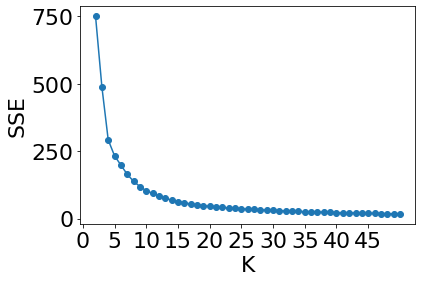

In [52]:
plt.plot(range(2, len(sse_list) + 2), sse_list, marker='o')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

#### - plot Silhouette~K

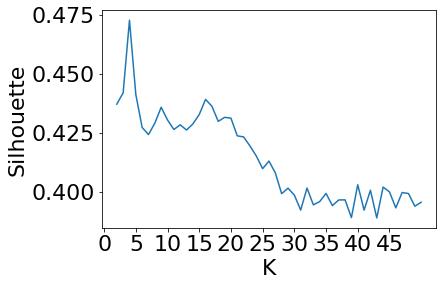

In [53]:
plt.plot(range(2, len(sil_list) + 2), sil_list)
plt.ylabel('Silhouette', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

#### - generate clusters by a good K value chosen from the plots above (elbow rule in SSE~K)

In [54]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100)
kmeans.fit(tmcs_values)
print('Silhouette %s' % silhouette_score(tmcs_values, kmeans.labels_))

Silhouette 0.47273421583704045


#### - Clusters distribution

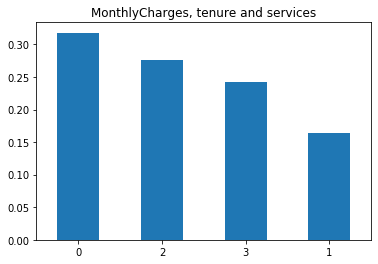

In [55]:
pd.Series(kmeans.labels_) \
    .value_counts(normalize = True) \
    .plot(kind = 'bar', title = 'MonthlyCharges, tenure and services')
plt.xticks(rotation=0)
plt.show()

#### - scatter plot of MonthlyCharges~tenure with clusters labels as color

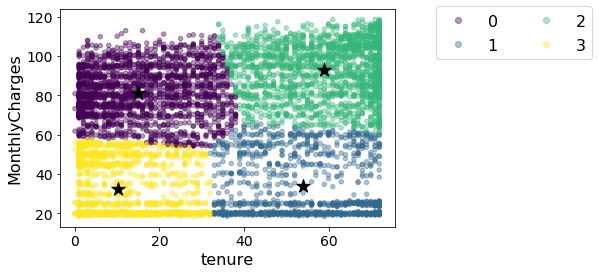

In [56]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

scatter = plt.scatter(tmcs_df['tenure'], tmcs_df['MonthlyCharges'], c=kmeans.labels_, s=20, alpha = 0.4)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='k')

font_size = 16
plt.tick_params(axis='both', which='major', labelsize=font_size-2)

plt.ylabel('MonthlyCharges', fontsize=font_size)
plt.xlabel('tenure', fontsize=font_size)

plt.legend(*scatter.legend_elements(), fontsize=font_size, ncol=2, bbox_to_anchor=(1.1, 1.05))

plt.show()

#### - centroids plot

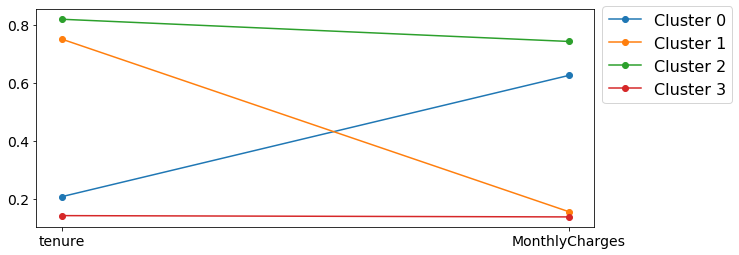

In [57]:
centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=font_size)
plt.xticks(range(0, len(tmcs_df.columns)), tmcs_df.columns, fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)
plt.legend(fontsize=16, ncol=1, bbox_to_anchor=(1.0, 1.05))
plt.show()

#### - crosstab by Churn

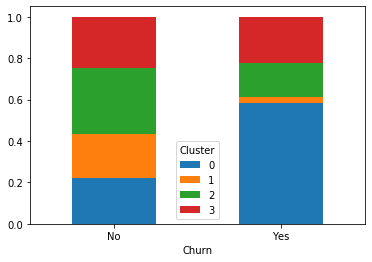

In [58]:
cluster_series = pd.Series(data=kmeans.labels_, name='Cluster')
churn_cross = pd.crosstab(customers["Churn"], cluster_series)

churn_cross \
    .div(churn_cross.sum(1).astype(float), axis=0) \
    .plot(kind='bar', stacked = True)
plt.xticks(rotation=0)

plt.show()

#### - features info of the 'Churn Yes' cluster

In [59]:
brc_cluster_df = customers.copy()
brc_cluster_df[cluster_series.name] = cluster_series
brc_cluster_df[[c for c in brc_cluster_df.columns if c != 'Cluster']][brc_cluster_df['Cluster'] == 0].describe()

,tenure,MonthlyCharges,TotalCharges
count,2239.000000,2239.000000,2239.000000
mean,15.004466,81.102345,1228.232403
std,11.120229,12.640342,949.402913
min,0.000000,54.200000,0.000000
25%,4.000000,70.925000,350.900000
50%,13.000000,80.150000,1067.050000
75%,24.000000,90.450000,1948.875000
max,38.000000,112.950000,3694.700000


## Classification by DecisionTree

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV

#for the tree image
import pydotplus
from sklearn import tree
from IPython.display import Image

# result analysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score
import seaborn as sn

### 1. Data preparation

In [73]:
services = ['MultipleLines', 'InternetService']
e_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
contract_info = ['Contract', 'PaymentMethod']
features_multi = services + e_services + contract_info

services_bin = ['PhoneService']
customer_info_bin = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
contract_info_bin = ['PaperlessBilling']
features_bin = services_bin + customer_info_bin + contract_info_bin

numeric = ['tenure', 'MonthlyCharges']

features = features_multi + features_bin + numeric

In [74]:
# target
churn_series = pd.Series(LabelEncoder().fit_transform(customers['Churn']), name='Churn')

# multi-value
features_df = pd.get_dummies(customers[features_multi], prefix_sep='=')

# binary
for f in features_bin:
    features_df[f] = LabelEncoder().fit_transform(customers[f])

# numeric
features_df = features_df.join(customers[numeric])

features_df.head()

,MultipleLines=No,MultipleLines=No phone service,MultipleLines=Yes,InternetService=DSL,InternetService=Fiber optic,InternetService=No,OnlineSecurity=No,OnlineSecurity=No internet service,OnlineSecurity=Yes,OnlineBackup=No,...,PaymentMethod=Electronic check,PaymentMethod=Mailed check,PhoneService,gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,tenure,MonthlyCharges
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,29.85
1,1,0,0,1,0,0,0,0,1,1,...,0,1,1,1,0,0,0,0,34,56.95
2,1,0,0,1,0,0,0,0,1,0,...,0,1,1,1,0,0,0,1,2,53.85
3,0,1,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,45,42.30
4,1,0,0,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,1,2,70.70


In [83]:
X = features_df.values
y = churn_series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### 2. Hyperparameter tuning

In [76]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [84]:
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier()

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=150, cv=5)
random_search.fit(X, y)
report(random_search.cv_results_, n_top=2)

Model with rank: 1
Mean validation score: 0.794 (std: 0.010)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 100, 'max_depth': 9, 'criterion': 'gini'}

Model with rank: 1
Mean validation score: 0.794 (std: 0.010)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 100, 'max_depth': 15, 'criterion': 'gini'}

Model with rank: 1
Mean validation score: 0.794 (std: 0.010)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 100, 'max_depth': 15, 'criterion': 'gini'}

Model with rank: 1
Mean validation score: 0.794 (std: 0.010)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 100, 'max_depth': 18, 'criterion': 'gini'}

Model with rank: 1
Mean validation score: 0.794 (std: 0.010)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 100, 'max_depth': 9, 'criterion': 'gini'}

Model with rank: 1
Mean validation score: 0.794 (std: 0.010)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 100, 'max_depth': 12, 'criterion': 'gini'}

Model with rank: 1
Mean 

### 3. Perform Classification

In [85]:
clf = random_search.best_estimator_
clf = clf.fit(X_train, y_train)

#### 3.1 Features selection

In [86]:
#print features importance as dataframe
importance_df = pd.DataFrame({'features': features_df.columns, 'importance': clf.feature_importances_})
importance_df.set_index(keys=['features'], inplace=True)
importance_df.sort_values('importance', ascending=False)

,importance
features,
Contract=Month-to-month,0.507003
tenure,0.186186
InternetService=Fiber optic,0.178297
MonthlyCharges,0.028517
PaymentMethod=Electronic check,0.026559
OnlineSecurity=No,0.024440
OnlineBackup=No,0.013876
Contract=Two year,0.010646
StreamingMovies=Yes,0.009623


In [87]:
# select from model the features with at least 0.01 as importance index, in order to simplify the model
model = SelectFromModel(clf, prefit=True, threshold=0.01)
model.transform(X_train).shape  

(4930, 8)

In [89]:
features_df_new = features_df.loc[:, model.get_support()]
features_df_new.head()

,InternetService=Fiber optic,OnlineSecurity=No,OnlineBackup=No,Contract=Month-to-month,Contract=Two year,PaymentMethod=Electronic check,tenure,MonthlyCharges
id,,,,,,,,
0,0,1,0,1,0,1,1,29.85
1,0,0,1,0,0,0,34,56.95
2,0,0,0,1,0,0,2,53.85
3,0,0,1,0,0,0,45,42.30
4,1,1,1,1,0,1,2,70.70


#### 3.2 Split and fit again after the features selections

In [90]:
# split again the dataframe after the features selection
features_df_new = features_df.loc[:, model.get_support()]
X = features_df_new.values
y = churn_series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [93]:
# fit again the model with the new train set
clf = clf.fit(X_train, y_train)

#### 3.3 Predict

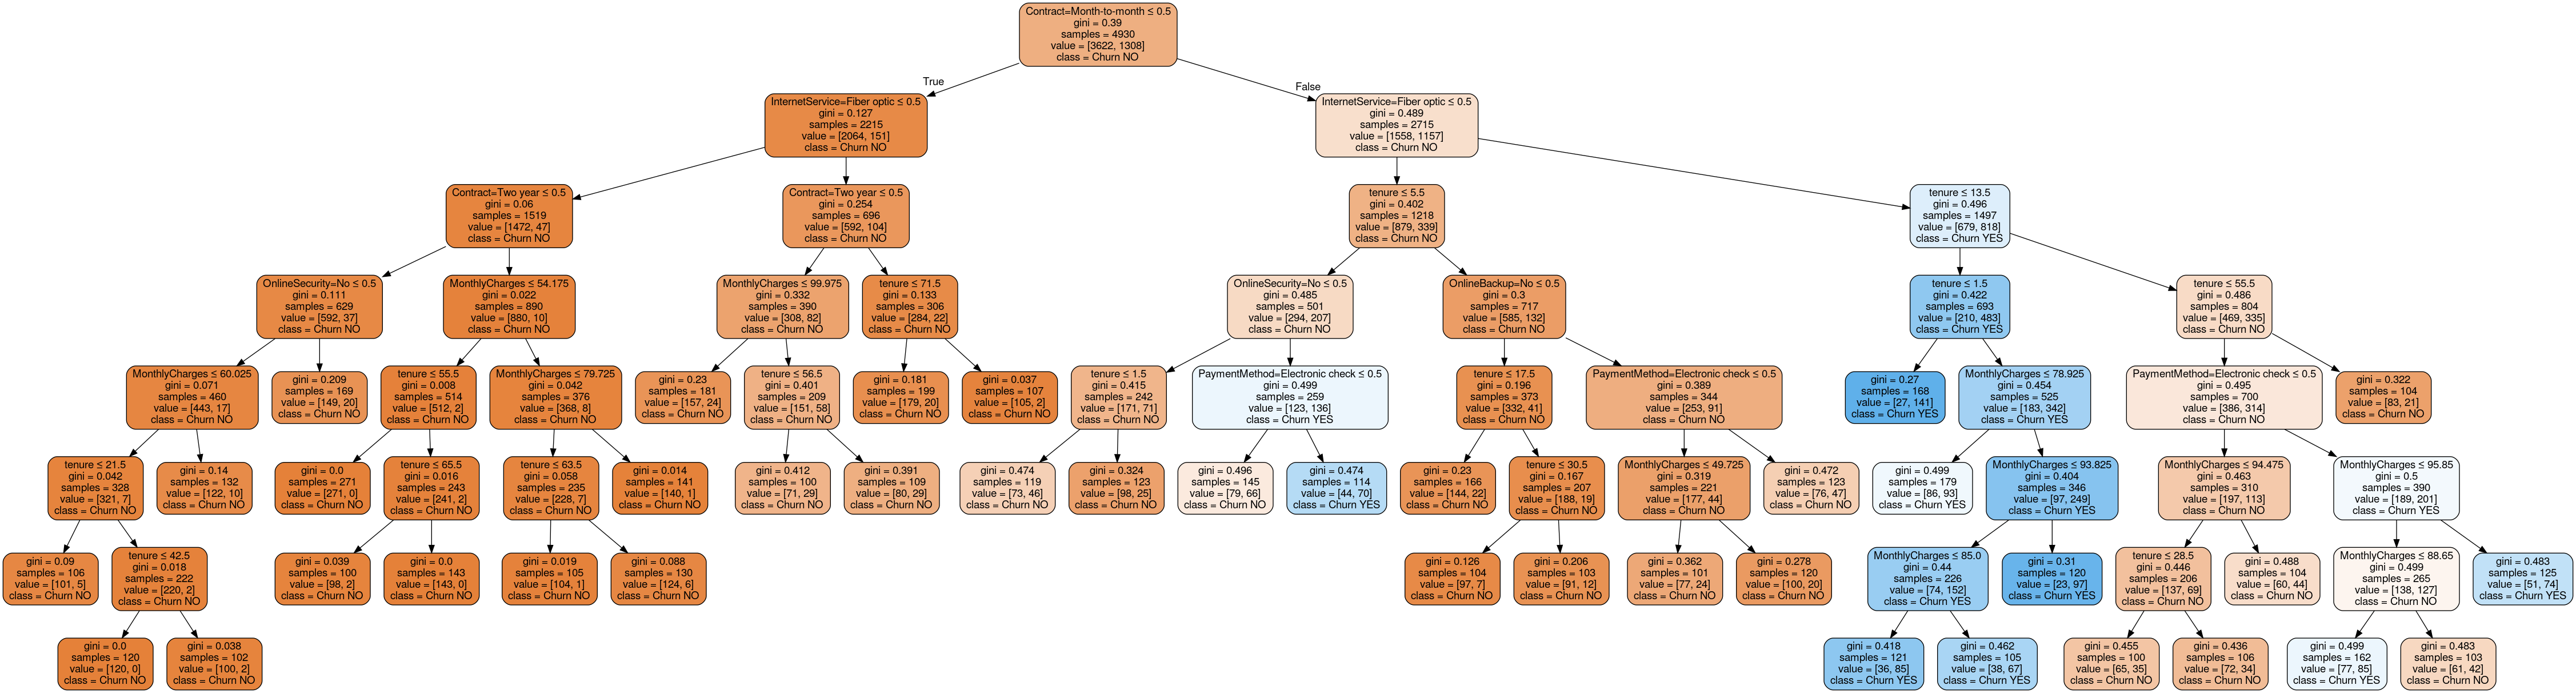

In [94]:
# predict and show the three
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

dot_data = tree.export_graphviz(
    clf, out_file=None,
    feature_names=features_df_new.columns,
    class_names=['Churn YES' if x == 1 else 'Churn NO' for x in clf.classes_],  
    filled=True, rounded=True,  
    special_characters=True,
    max_depth=7
)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [95]:
# show the used features
importance_df = pd.DataFrame({'features': features_df_new.columns, 'importance': clf.feature_importances_})
importance_df.set_index(keys=['features'], inplace=True)
importance_df.sort_values('importance', ascending=False)

,importance
features,
Contract=Month-to-month,0.512862
tenure,0.189650
InternetService=Fiber optic,0.180358
MonthlyCharges,0.037997
PaymentMethod=Electronic check,0.026866
OnlineSecurity=No,0.024723
OnlineBackup=No,0.014036
Contract=Two year,0.013508


### 4. Analyze the classification performance

#### 4.1 Accuracy and F1-score (train set and test set)

In [99]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Train Accuracy 0.8016227180527383
Train F1-score [0.86886565 0.5928393 ]

Test Accuracy 0.7974443918599148
Test F1-score [0.86683261 0.5770751 ]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



#### 4.2 Confusion matrix

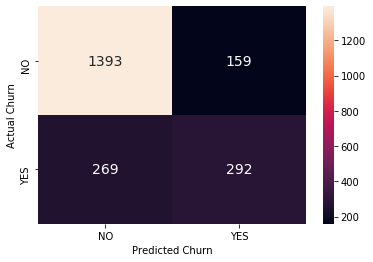

In [100]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = ["NO", "YES"], columns = ["NO", "YES"])
sn.heatmap(df_cm, annot=True, fmt='', annot_kws={"size": 14})
plt.ylabel('Actual Churn')
plt.xlabel('Predicted Churn')
plt.show()

#### 4.2 ROC curve

0.7090253275630778


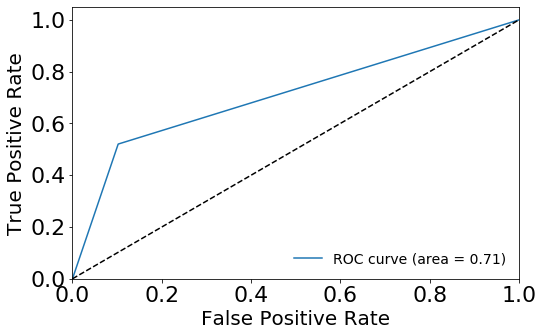

In [101]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

#### 4.3 Accuracy and F1-score by cross-validation

In [106]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7911 (+/- 0.03)
F1-score: 0.7015 (+/- 0.05)


#### 4.4 Training curve

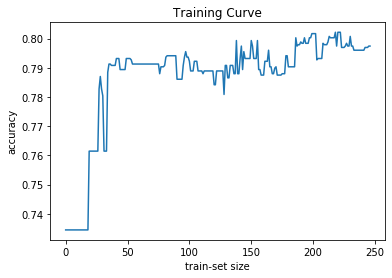

In [111]:
scores = list()
for nbr_records in np.arange(20, len(X_train) + 20, 20):
    clf.fit(X_train[:nbr_records], y_train[:nbr_records])
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(scores)
plt.title('Training Curve')
plt.ylabel('accuracy')
plt.xlabel('train-set size')
plt.show()

## Classification by RandomForest

In [120]:
from sklearn.ensemble import RandomForestClassifier

### 1. Split dataset

In [121]:
X = features_df.values
y = churn_series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### 2. Hyperparameter tuning

In [122]:
param_list = {
    'max_depth': [None] + list(np.arange(2, 50)),
      'min_samples_split': [2, 5, 10, 15, 20, 30, 50, 100, 150],
      'min_samples_leaf': [1, 5, 10, 15, 20, 30, 50, 100, 150],
      'criterion': ['gini', 'entropy']
}

clf = RandomForestClassifier(
    n_estimators=20, criterion='gini', max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, class_weight=None
)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100, cv=5)
random_search.fit(X, y)
report(random_search.cv_results_, n_top=2)

Model with rank: 1
Mean validation score: 0.804 (std: 0.010)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 20, 'max_depth': 41, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.802 (std: 0.013)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 30, 'max_depth': None, 'criterion': 'gini'}



### 3. Predict

In [123]:
clf = random_search.best_estimator_

y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

### 4. Analyze the classification performance

#### 4.1 Accuracy and F1-score (train set and test set)

In [124]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Train Accuracy 0.8133874239350912
Train F1-score [0.87833906 0.59965187]

Test Accuracy 0.8277330809275911
Test F1-score [0.88834356 0.62318841]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1552
           1       0.74      0.54      0.62       561

    accuracy                           0.83      2113
   macro avg       0.80      0.73      0.76      2113
weighted avg       0.82      0.83      0.82      2113



#### 4.2 Confusion matrix

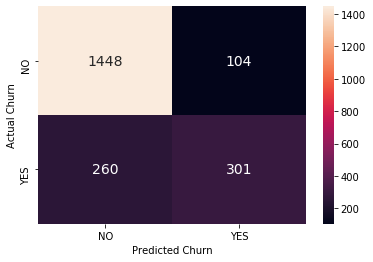

In [125]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = ["NO", "YES"], columns = ["NO", "YES"])
sn.heatmap(df_cm, annot=True, fmt='', annot_kws={"size": 14})
plt.ylabel('Actual Churn')
plt.xlabel('Predicted Churn')
plt.show()

#### 4.3 ROC curve

0.7347657901023578


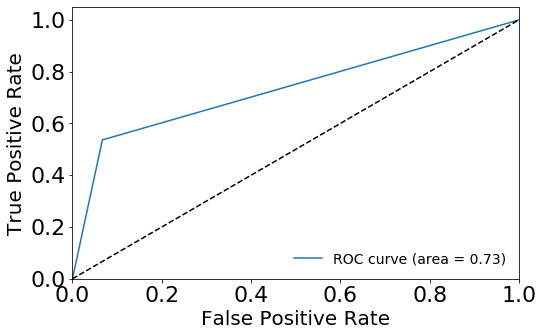

In [126]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

#### 4.3 Accuracy and F1-score by cross-validation

In [127]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8001 (+/- 0.03)
F1-score: 0.7140 (+/- 0.04)


#### 4.4 Training curve

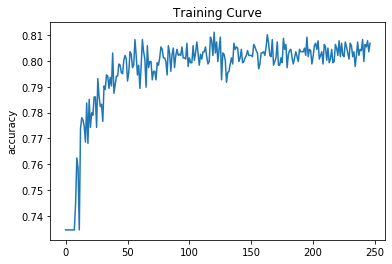

In [128]:
scores = list()
for nbr_records in np.arange(20, len(X_train) + 20, 20):
    clf.fit(X_train[:nbr_records], y_train[:nbr_records])
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(scores)
plt.title('Training Curve')
plt.ylabel('accuracy')
plt.show()

## Pattern mining

In [17]:
from fim import apriori
import operator

### 1. Data preparation

Ad ogni singolo valore delle fetaure abbiamo aggiunto come suffisso il nome della stessa feature in modo da distinguere i valori duplicati, e capire così a quale
feature il valore fa riferimento. Inoltre, abbiamo aggregato i valori delle variabile numeriche mediante la tecnica di binning.

In [18]:
pm_df = customers.copy()
pm_df['tenureBin'] = pd.cut(pm_df['tenure'].astype(int), bins=15, right=False)
pm_df['MonthlyChargesBin'] = pd.cut(pm_df['MonthlyCharges'].astype(int), bins=15, right=False)
pm_df.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)

for f in pm_df.columns:
    pm_df[f] = pm_df[f].astype(str) + '_' + f
    
pm_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenureBin,MonthlyChargesBin
id,,,,,,,,,,,,,,,,,,,
0,Female_gender,No_SeniorCitizen,Yes_Partner,No_Dependents,No_PhoneService,No phone service_MultipleLines,DSL_InternetService,No_OnlineSecurity,Yes_OnlineBackup,No_DeviceProtection,No_TechSupport,No_StreamingTV,No_StreamingMovies,Month-to-month_Contract,Yes_PaperlessBilling,Electronic check_PaymentMethod,No_Churn,"[0.0, 4.8)_tenureBin","[24.667, 31.333)_MonthlyChargesBin"
1,Male_gender,No_SeniorCitizen,No_Partner,No_Dependents,Yes_PhoneService,No_MultipleLines,DSL_InternetService,Yes_OnlineSecurity,No_OnlineBackup,Yes_DeviceProtection,No_TechSupport,No_StreamingTV,No_StreamingMovies,One year_Contract,No_PaperlessBilling,Mailed check_PaymentMethod,No_Churn,"[33.6, 38.4)_tenureBin","[51.333, 58.0)_MonthlyChargesBin"
2,Male_gender,No_SeniorCitizen,No_Partner,No_Dependents,Yes_PhoneService,No_MultipleLines,DSL_InternetService,Yes_OnlineSecurity,Yes_OnlineBackup,No_DeviceProtection,No_TechSupport,No_StreamingTV,No_StreamingMovies,Month-to-month_Contract,Yes_PaperlessBilling,Mailed check_PaymentMethod,Yes_Churn,"[0.0, 4.8)_tenureBin","[51.333, 58.0)_MonthlyChargesBin"
3,Male_gender,No_SeniorCitizen,No_Partner,No_Dependents,No_PhoneService,No phone service_MultipleLines,DSL_InternetService,Yes_OnlineSecurity,No_OnlineBackup,Yes_DeviceProtection,Yes_TechSupport,No_StreamingTV,No_StreamingMovies,One year_Contract,No_PaperlessBilling,Bank transfer (automatic)_PaymentMethod,No_Churn,"[43.2, 48.0)_tenureBin","[38.0, 44.667)_MonthlyChargesBin"
4,Female_gender,No_SeniorCitizen,No_Partner,No_Dependents,Yes_PhoneService,No_MultipleLines,Fiber optic_InternetService,No_OnlineSecurity,No_OnlineBackup,No_DeviceProtection,No_TechSupport,No_StreamingTV,No_StreamingMovies,Month-to-month_Contract,Yes_PaperlessBilling,Electronic check_PaymentMethod,Yes_Churn,"[0.0, 4.8)_tenureBin","[64.667, 71.333)_MonthlyChargesBin"


### 2. Functions to show patterns and rules

In [19]:
def convert_to_dict(itemset):
    itemset_dict = dict()
    
    for s in itemset[0]:
        value, key = s.split('_')
        itemset_dict[key] = value
        
    itemset_dict['support (%)'] = itemset[2]
    return itemset_dict

In [20]:
def itemsets_to_df(itemsets, ignore_len=False):
    fp_df = pd.DataFrame(columns = (list(pm_df.columns) + ['support (%)']))
    
    current_len = 0
    columns_to_keep = set()
    for i in itemsets:
        if current_len != len(i[0]) or ignore_len:
            current_len = len(i[0])
            tmp_dict = convert_to_dict(i)
            columns_to_keep.update(list(tmp_dict.keys()))
            fp_df = fp_df.append(tmp_dict, ignore_index=True)

    fp_df.drop(columns=[c for c in fp_df.columns if c not in columns_to_keep], inplace=True)
    fp_df.fillna(value='', inplace=True) 
    
    return fp_df

In [21]:
def rule_to_dict(rule):
    #print(itemset)
    rule_dict = dict()
    for s in rule[1]:
        value, key = s.split('_')
        rule_dict[key] = value
        
    c_value, c_key = rule[0].split('_')
    rule_dict[c_key] = '<< ' + c_value + ' >>'
    
    rule_dict['support (%)'] = rule[3]
    rule_dict['confidence (%)'] = rule[4]
    rule_dict['lift'] = rule[5]
    return rule_dict

In [22]:
def rules_to_df(rules, ignore_len=False):
    fp_df = pd.DataFrame(columns = (list(pm_df.columns) + ['lift', 'confidence (%)', 'support (%)']))
    columns_to_keep = set()
    
    current_lift = 0
    current_heads = []
    for r in rules:
        if current_lift != r[5] and r[0] not in current_heads:
            current_lift = r[5]
            current_heads.append(r[0])
            
            tmp_dict = rule_to_dict(r)
            columns_to_keep.update(list(tmp_dict.keys()))
            fp_df = fp_df.append(tmp_dict, ignore_index=True)

    fp_df.drop(columns=[c for c in fp_df.columns if c not in columns_to_keep], inplace=True)
    fp_df.fillna(value='', inplace=True) 
    
    return fp_df

### 3. Patterns and rules by features "categories": customer info, services, contract info

In seguito ai primi test di estrazione di pattern, il primo aspetto che è emerso, è stata la presenza nei risultati di patterns decisamente poco significativi.
Ovvero combinazioni di valori prive di informazioni effettivamente utili (e.g. Yes_Partner, No_PhoneService, No_DeviceProtection, Yes_PaperlessBilling). Questa parte dei risultati è dovuto alla diversa natura delle feature del dataset, ossia feature relative alle informazioni dei clienti, altre relative ai servizi acquistati e altre ancora relative a tipo di contratto e pagamenti.
Pertanto l'intuizione che abbiamo avuto, è stata quella di estrarre dall'universo dei pattern e regole associative generate, dei sottinsiemi di questi applicando delle regole (filtri), così da ottenere delle combinazioni quanto più significative possibile. Per esempio, nei pattern in cui compaiono valori di feature relative ai servizi, è indispensabile poter discriminare se quel set di clienti ha effettivamente acquistato il servizio internet o meno.

La regola zero che abbiamo applicato è stata quella di estrarre pattern e rule per categorie di feature. Ovvero applicare la funzione di estrazione a dataframe contenenti solo un sottoinsieme di tutte le colone del dataset di partenza. I sottoinsiemi coincidono appunto con le categorie di feature sopra citate (1. info cliente, 2. info servizi, 3. info contratto e pagamenti).
Da notare, che non in tutti e tre i casi abbiamo voluto estarre delle regole associative. L'unico caso in cui abbiamo pensato potesse aver più senso estarre delle regole associative è la parte dei servizi acquistati dal cliente, che coincide un po' con uno dei casi più esemplari di pattern mining, il carrello della spesa. E quindi è possibile leggere le regole estratte allo stesso modo.

NOTE TECNICHE:
In quasi la totalità dei casi abbiamo applicato un supporto minimo pari al 10% e quattro come numero minimo di feature. E, in aggiunta per le regole associative, un valore minimo di confidence pari al 60%. Abbiamo deciso di mantenere delle soglie così basse in modo da provare ad estrarre qualcosa di interessante anche per valori bassi dei suddetti parametri.
(Solo in alcuni casi di estrazione di pattern abbiamo ridotto il numero minimo delle feature a due e tre, laddove il numero delle feature coinvolte era minore o uguale a quattro).

In [23]:
customer_info = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
contract_info = ['Contract', 'PaperlessBilling', 'PaymentMethod']
services = ['InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

n_top = 5 # Top 5

#### 3.1 CUSTOMER INFO patterns with supp_min = 10 and zmin = 3

##### 3.1.1 Patterns with z = 4

In [151]:
tracts = pm_df[customer_info].values.tolist()
itemsets = apriori(tracts, supp=10, zmin=3, target='a', report='S') 
itemsets = [(i[0], len(i[0]), i[1]) for i in itemsets]
itemsets.sort(key=operator.itemgetter(1, 2), reverse=True)
#print('Number of itemsets:', len(itemsets))
itemsets_to_df([i for i in itemsets if i[1] == 4], True)

,gender,SeniorCitizen,Partner,Dependents,support (%)
0,Male,No,No,No,19.608122
1,Female,No,No,No,18.997586
2,Female,No,Yes,Yes,11.983530
3,Male,No,Yes,Yes,11.671163


##### 3.1.2 Patterns with z = 3 (Top 5)

In [152]:
itemsets_to_df([i for i in itemsets if i[1] == 3][:n_top], True)

,gender,SeniorCitizen,Partner,Dependents,support (%)
0,,No,No,No,38.605708
1,Male,No,,No,27.658668
2,Female,No,,No,27.459889
3,,No,Yes,Yes,23.654693
4,Female,,No,No,23.498509


#### 3.2 CONTRACT INFO patterns with supp_min = 10 and zmin = 2

##### 3.2.1 Patterns with z = 3

In [146]:
tracts = pm_df[contract_info].values.tolist()
itemsets = apriori(tracts, supp=10, zmin=2, target='a', report='S') 
itemsets = [(i[0], len(i[0]), i[1]) for i in itemsets]
itemsets.sort(key=operator.itemgetter(1, 2), reverse=True)
#print('Number of itemsets:', len(itemsets))
itemsets_to_df([i for i in itemsets if i[1] == 3][:n_top], True)

,Contract,PaperlessBilling,PaymentMethod,support (%)
0,Month-to-month,Yes,Electronic check,19.835297


##### 3.2.2 Patterns with z = 2 (Top 5)

In [149]:
itemsets_to_df([i for i in itemsets if i[1] == 2][:n_top], True)

,Contract,PaperlessBilling,PaymentMethod,support (%)
0,Month-to-month,Yes,,36.717308
1,Month-to-month,,Electronic check,26.267216
2,,Yes,Electronic check,24.733778
3,Month-to-month,No,,18.301860
4,,No,Mailed check,13.573761


#### 3.3 SERVICES patterns with supp_min = 10 and zmin = 4

A questo punto dell'estrazione, a nostro avviso, ha molto senso applicare un'altra regola (filtro): pattern che permettano di discriminare se il cliente ha acuqistato il servizio internet o meno. Pertanto il risultato si divide in due parti: "No internet service" e "Yes internet service".

##### 3.3.1 Most frequent pattern about "No internet service"

Quello che segue è il pattern più frequente (e anche il più lungo) del caso "No internet service".

In [26]:
tracts = pm_df[services].values.tolist()
itemsets = apriori(tracts, supp=10, zmin=4, target='a', report='S') 
itemsets = [(i[0], len(i[0]), i[1]) for i in itemsets]
itemsets.sort(key=operator.itemgetter(2), reverse=True)
#print('Number of itemsets:', len(itemsets))
itemsets_to_df([itemsets[0]])

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,support (%)
0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,21.666903


##### 3.3.2 Patterns about "Yes internet service" with z = 4 (Top 5)

(sono stati estratti pattern solo di due lunghezze: quattro (molti) e cinque (uno soltanto)).

In [27]:
yes_is = set(
    ['DSL_InternetService', 'Fiber optic_InternetService', \
    'Yes_OnlineSecurity', 'Yes_OnlineBackup', 'Yes_DeviceProtection', 'Yes_TechSupport', 'Yes_StreamingTV', 'Yes_StreamingTV']
)
yes_is_subitemsets = [i for i in itemsets if len(yes_is & set(i[0])) > 0]
#print(len(yes_is_subitemsets))
itemsets_to_df([i for i in yes_is_subitemsets if i[1] == 4][:n_top], True)

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,support (%)
0,,Fiber optic,No,No,,No,,,16.527048
1,,Fiber optic,No,,No,No,,,16.512850
2,Yes,Fiber optic,No,,,No,,,14.610251
3,,Fiber optic,,No,No,No,,,14.141701
4,Yes,Fiber optic,,,,,Yes,Yes,13.644754


##### 3.3.2 Patterns about "Yes internet service" with z = 5

In [28]:
itemsets_to_df([i for i in yes_is_subitemsets if i[1] == 5][:n_top])

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,support (%)
0,Fiber optic,No,No,No,No,12.040324


#### 3.4 SERVICES rules with supp_min = 10, conf_min=60 and zmin = 4

Anche in questo caso abbiamo applicato la regola per discriminare internet si o no. 

In merito alle regole associative abbiamo applicato un filtro che tirasse fuori dei sottoinsiemi quanto più reppresentativi possibile.
Così abbiamo generato due sottoinsiemi: le più "forti" (alto lift) e le più "popolari" (alto supporto). Entrambi i sottoinsiemi riportano una regola per ciascuna delle feature coinvolte.

##### 3.4.1 (Most representative) Rules about "Yes internet service"

##### 3.4.1.1 Most "strong"

In [58]:
tracts = pm_df[services].values.tolist()
rules = apriori(tracts, supp=10, zmin=4, target='r', conf=60, report='XCl')
#print(len(rules))
rules = [(i[0], i[1], len(i[1]), i[2], i[3], i[4]) for i in rules]
rules.sort(key=operator.itemgetter(5, 4, 3, 2), reverse=True)
yes_is_rules = [r for r in rules if r[0] in yes_is or len(set(r[1]) & yes_is) > 0]
#print(len(yes_is_rules))
rules_to_df(yes_is_rules)

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,lift,confidence (%),support (%)
0,,,Yes,,Yes,<< Yes >>,,Yes,2.407330,69.864865,10.506886
1,,,<< Yes >>,Yes,Yes,Yes,,,2.258305,64.738292,10.308107
2,Yes,Fiber optic,,,Yes,,<< Yes >>,Yes,2.231617,85.772914,10.379100
3,Yes,Fiber optic,,,Yes,,Yes,<< Yes >>,2.199162,85.306122,10.435894
4,Yes,,,Yes,<< Yes >>,,Yes,Yes,2.179923,74.964838,10.095130
5,,DSL,,,No,,No,<< No >>,2.084262,82.417582,14.212693
6,,DSL,,,,No,<< No >>,No,2.071651,82.654249,12.196507
7,Yes,<< Fiber optic >>,,,,No,Yes,,2.032919,89.364162,12.281698
8,Yes,,,<< Yes >>,,Yes,Yes,,1.938461,66.853933,10.109328
9,<< Yes >>,Fiber optic,,,Yes,,Yes,Yes,1.855624,78.277154,11.372994


##### 3.4.1.2 Most "popular"

In [49]:
rules.sort(key=operator.itemgetter(3, 5, 4, 2), reverse=True)
yes_is_rules = [r for r in rules if r[0] in yes_is or len(set(r[1]) & yes_is) > 0]
#print(len(yes_is_rules))
rules_to_df(yes_is_rules)

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,lift,confidence (%),support (%)
0,,,No,Yes,,<< Fiber optic >>,,,,,,,,Yes,,,1.550126,68.141277,39.798381
1,,,No,Yes,,Fiber optic,<< No >>,,,,,,,,,,1.515454,75.267050,34.559137
2,,,No,Yes,,Fiber optic,,,,<< No >>,,,,,,,1.511366,74.527527,34.559137
3,,,No,Yes,<< Yes >>,Fiber optic,,,,,,,,,,,1.472605,62.119967,34.559137
4,,,No,Yes,,Fiber optic,,,,,,,<< Month-to-month >>,,,,1.329932,73.171734,34.559137
5,,,No,Yes,,Fiber optic,,,,,,,,<< Yes >>,,,1.325044,78.471652,34.559137
6,,<< No >>,No,Yes,,Fiber optic,,,,,,,,,,,1.197649,61.914544,34.559137
7,<< No >>,,No,Yes,,Fiber optic,,,,,,,,,,,0.814972,68.282662,34.559137
8,,,<< No >>,Yes,,Fiber optic,,,,,,,,Yes,,,1.138609,79.749478,34.005395
9,No,,,Yes,,Fiber optic,,,,,,,,,,<< No >>,0.817940,60.088300,32.159591


### 4. Patterns and rules by ALL FEATURES with supp_min = 10 and zmin = 4

Dopo l'estrazione di pattern e regole associative per categorie di feature, abbiamo applicato gli stessi criteri di estrazione all'intero dataset includendo tutte le colonne.

#### 4.1 The most frequent pattern about "No Internet Service"

In [37]:
tracts = pm_df.values.tolist()
itemsets = apriori(tracts, supp=10, zmin=4, target='a', report='S') 
itemsets = [(i[0], len(i[0]), i[1]) for i in itemsets]
itemsets.sort(key=operator.itemgetter(2), reverse=True)
#print('Number of itemsets:', len(itemsets))

no_is_subitemsets = [i for i in itemsets if 'No_InternetService' in i[0]]
itemsets_to_df([no_is_subitemsets[0]])

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,support (%)
0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,21.666903


#### 4.2 Patterns about "Yes Internet Service" with z = 4 (Top 5)

In [39]:
yes_is_subitemsets = [i for i in itemsets if len(yes_is & set(i[0])) > 0]
#print(len(yes_is_subitemsets))
itemsets_to_df([i for i in yes_is_subitemsets if i[1] == 4][:n_top], True)

,Dependents,PhoneService,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,support (%)
0,No,Yes,Fiber optic,,,,Yes,27.119125
1,No,Yes,Fiber optic,No,,,,26.011643
2,No,Yes,Fiber optic,,No,,,25.756070
3,,Yes,Fiber optic,,No,Month-to-month,,25.500497
4,,Yes,Fiber optic,No,,,Yes,25.429504


#### 4.3 Patterns about "Yes Internet Service" with z = 5 (Top 5)

In [40]:
itemsets_to_df([i for i in yes_is_subitemsets if i[1] == 5][:n_top], True)

,Dependents,PhoneService,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,support (%)
0,,Yes,Fiber optic,No,No,Month-to-month,,21.638506
1,No,Yes,Fiber optic,,No,Month-to-month,,21.524918
2,No,Yes,Fiber optic,No,,Month-to-month,,21.226750
3,No,Yes,Fiber optic,No,No,,,20.800795
4,No,Yes,Fiber optic,No,,,Yes,20.729803


#### 4.4 Patterns about "Yes Internet Service" with z = 6 (Top 5)

In [42]:
itemsets_to_df([i for i in yes_is_subitemsets if i[1] == 6][:n_top], True)

,Dependents,PhoneService,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,support (%)
0,No,Yes,Fiber optic,No,No,Month-to-month,,18.401249
1,,Yes,Fiber optic,No,No,Month-to-month,Yes,17.364759
2,No,Yes,Fiber optic,,No,Month-to-month,Yes,17.080789
3,No,Yes,Fiber optic,No,,Month-to-month,Yes,17.052392
4,No,Yes,Fiber optic,No,No,,Yes,16.598041


#### 4.5 Patterns about "Yes Internet Service" with z = 7 (Top 5)

In [43]:
itemsets_to_df([i for i in yes_is_subitemsets if i[1] == 7][:n_top], True)

,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,support (%)
0,,No,Yes,Fiber optic,No,,,No,Month-to-month,Yes,14.766435
1,,No,Yes,Fiber optic,No,,No,No,Month-to-month,,13.218799
2,,No,Yes,Fiber optic,No,No,,No,Month-to-month,,13.076814
3,No,No,Yes,Fiber optic,No,,,No,Month-to-month,,13.048417
4,,,Yes,Fiber optic,No,,No,No,Month-to-month,Yes,12.310095


#### 4.6 Patterns about "Yes Internet Service" with z = 8 (Top 5)

In [44]:
itemsets_to_df([i for i in yes_is_subitemsets if i[1] == 8][:n_top], True)

,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,support (%)
0,,No,Yes,Fiber optic,No,,No,No,Month-to-month,Yes,,10.634673
1,,No,Yes,Fiber optic,No,No,,No,Month-to-month,Yes,,10.336504
2,No,No,Yes,Fiber optic,No,,,No,Month-to-month,Yes,,10.322306
3,,No,Yes,Fiber optic,No,,,No,Month-to-month,Yes,Electronic check,10.194519
4,,No,Yes,Fiber optic,No,No,No,No,Month-to-month,,,10.024137


#### 4.7 (Most representative) Rules with supp_min = 10, conf_min = 60 and zmin = 4

##### 4.7.1 Most "strong"

In [57]:
tracts = pm_df.values.tolist()
rules = apriori(tracts, supp=10, zmin=4, target='r', conf=60, report='XCl')
rules = [(i[0], i[1], len(i[1]), i[2], i[3], i[4]) for i in rules]
rules.sort(key=operator.itemgetter(5, 4, 3, 2), reverse=True)
valid_rules = [r for r in rules if r[0] in yes_is or len(set(r[1]) & yes_is) > 0 or r[0] == 'No_InternetService' or 'No_InternetService' in r[1]]
rules_to_df(valid_rules)

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyChargesBin,lift,confidence (%),support (%)
0,,,,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,,,,,"<< [18.0, 24.667) >>",5.070554,100.000000,16.811018
1,,,,Yes,,No,No internet service,No internet service,<< No internet service >>,No internet service,No internet service,No internet service,,,,,,4.615334,100.000000,21.666903
2,,,,,,<< No >>,,,,,,,,No,,No,"[18.0, 24.667)",4.569232,99.001110,12.792844
3,,,,,,,Yes,,Yes,Yes,,,<< Two year >>,,,,,2.785649,67.040673,10.123527
4,,,,,,,Yes,,,<< Yes >>,,,Two year,,,No,,2.766061,80.275862,10.293909
5,,,No,Yes,,Fiber optic,No,,,No,,,Month-to-month,Yes,Electronic check,<< Yes >>,,2.618934,69.498607,10.194519
6,,,,,,,<< Yes >>,,,Yes,,,Two year,,,No,,2.563416,73.484848,11.245208
7,No,Yes,<< Yes >>,Yes,,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,,,,,,2.455316,73.558368,10.095130
8,,,,,,,,,<< Yes >>,,,Yes,Two year,,,No,,2.431218,83.606557,10.393298
9,,,,Yes,Yes,Fiber optic,,,Yes,,<< Yes >>,Yes,,,,,,2.231617,85.772914,10.379100


##### 4.7.2 Most "popular"

In [51]:
rules.sort(key=operator.itemgetter(3, 5, 4, 2), reverse=True)
valid_rules = [r for r in rules if r[0] in yes_is or len(set(r[1]) & yes_is) > 0 or r[0] == 'No_InternetService' or 'No_InternetService' in r[1]]
rules_to_df(valid_rules)

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyChargesBin,lift,confidence (%),support (%)
0,,,No,Yes,,<< Fiber optic >>,,,,,,,,Yes,,,,1.550126,68.141277,39.798381
1,,,No,Yes,,Fiber optic,<< No >>,,,,,,,,,,,1.515454,75.267050,34.559137
2,,,No,Yes,,Fiber optic,,,,<< No >>,,,,,,,,1.511366,74.527527,34.559137
3,,,No,Yes,<< Yes >>,Fiber optic,,,,,,,,,,,,1.472605,62.119967,34.559137
4,,,No,Yes,,Fiber optic,,,,,,,<< Month-to-month >>,,,,,1.329932,73.171734,34.559137
5,,,No,Yes,,Fiber optic,,,,,,,,<< Yes >>,,,,1.325044,78.471652,34.559137
6,,<< No >>,No,Yes,,Fiber optic,,,,,,,,,,,,1.197649,61.914544,34.559137
7,<< No >>,,No,Yes,,Fiber optic,,,,,,,,,,,,0.814972,68.282662,34.559137
8,,,<< No >>,Yes,,Fiber optic,,,,,,,,Yes,,,,1.138609,79.749478,34.005395
9,No,,,Yes,,Fiber optic,,,,,,,,,,<< No >>,,0.817940,60.088300,32.159591


### 5. Patterns in "Yes_Churn" sub-dataset

Dopo un'esplorazione panoramica in termini di pattern e regole associative dell'intero dataset, adesso il focus si sposta sul vero target dell'intera analisi, il "Churn".
Si è pensato di focalizzare l'estrazione su un sottoinsieme del dataset: i clienti che hanno lasciato la compagnia, così da titar fuori delle percentuali che contestualizzate su questo sottoinsieme possano essere più significative.
E cioè, è più significativo sapere che il circa il 55% dei cleinti che hanno lasciato la compagnia sono caratterizzati da (Yes_PhoneService, Fiber optic_InternetService, No_TechSupport, Month-to-month_Contract) piuttosto che gli stessi cleinti in oggetto costituiscono il 4% di tutto il dataset.

In [48]:
yc_pm_df = pm_df[pm_df['Churn'] == 'Yes_Churn'].drop(columns=['Churn'])
yc_tracts = yc_pm_df.values.tolist()

yc_itemsets = apriori(yc_tracts, supp=10, zmin=4, target='a', report='S')
yc_itemsets = [(i[0], -len(i[0]), i[1]) for i in yc_itemsets]
#print('Number of itemsets:', len(yc_itemsets))

yes_is_subitemsets = [i for i in yc_itemsets if len(yes_is & set(i[0])) > 0]
yes_is_subitemsets.sort(key=operator.itemgetter(1, 2), reverse=True)
#print(len(yes_is_subitemsets))

itemsets_to_df(yes_is_subitemsets)

,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,support (%)
0,,,Yes,Fiber optic,,,,No,Month-to-month,,,55.270198
1,,,Yes,Fiber optic,No,,,No,Month-to-month,,,49.491707
2,,No,Yes,Fiber optic,No,,,No,Month-to-month,,,42.857143
3,,No,Yes,Fiber optic,No,,,No,Month-to-month,Yes,,36.115570
4,,No,Yes,Fiber optic,No,,,No,Month-to-month,Yes,Electronic check,26.698769
5,,No,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,,20.492242
6,,No,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,15.462814
7,No,No,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,11.771001


Invece, per quanto riguarda le regole associative in questa parte, considerata la natura diversa delle feature, riteniamo che conoscere soltanto i pattern più significativi risulta già piuttosto efficace a profilare i clienti "Yes_Churn".